1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd
file_path = '/Users/yingnizhen/Desktop/open_rank_20236.csv'
data = pd.read_csv(file_path)
top_100_projects = data.nlargest(100, 'rank')
value_max = top_100_projects['value'].max()
value_min = top_100_projects['value'].min()
value_mean = top_100_projects['value'].mean()
value_median = top_100_projects['value'].median()
print("排名前100的项目的 'value' 值统计信息：")
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")


排名前100的项目的 'value' 值统计信息：
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [5]:
import pandas as pd
file_path = '/Users/yingnizhen/Desktop/activity_2022.csv'

data = pd.read_csv(file_path)

months_columns = [
    '20221_value', '20222_value', '20223_value', '20224_value', 
    '20225_value', '20226_value', '20227_value', '20228_value', 
    '20229_value', '202210_value', '202211_value', '202212_value'
]

data['average_growth_rate'] = data[months_columns].pct_change(axis=1).mean(axis=1)

top_10_projects = data.nlargest(10, '202212_value')

average_growth_rate_top_10 = top_10_projects['average_growth_rate'].mean()

print("美国排名前十项目的平均增长率：", average_growth_rate_top_10)


美国排名前十项目的平均增长率： 0.01250269185507713


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [7]:
import pandas as pd

china_file_path = '/Users/yingnizhen/Desktop/china_2022.csv'
global_file_path = '/Users/yingnizhen/Desktop/global_2022.csv'

china_data = pd.read_csv(china_file_path)
global_data = pd.read_csv(global_file_path)

columns_to_analyze = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']

def compute_summary_statistics(data, columns):
    summary = data[columns].agg(['mean', 'max', 'min', 'median']).transpose()
    summary.columns = ['Mean', 'Max', 'Min', 'Median']
    return summary

china_summary = compute_summary_statistics(china_data, columns_to_analyze)
global_summary = compute_summary_statistics(global_data, columns_to_analyze)

print("中国前十企业统计信息:\n", china_summary)
print("\n全球前十企业统计信息:\n", global_summary)


中国前十企业统计信息:
                      Mean        Max       Min     Median
issue_comment   61205.500  167814.00  11741.00  39141.000
open_issue       9169.200   22397.00    752.00   6889.500
open_pull       16912.700   35266.00   1823.00  15953.000
review_comment  19857.500   60402.00   2113.00  10851.000
merged_pull     13764.100   26732.00   1165.00  13705.500
value           40269.534  103368.49  12033.71  29789.235

全球前十企业统计信息:
                       Mean         Max       Min     Median
issue_comment   341409.400  1437317.00  78530.00  178629.00
open_issue       43300.200   189185.00  13162.00   21648.00
open_pull        83423.000   309685.00  27414.00   49103.50
review_comment  120392.100   456166.00  35072.00   70433.50
merged_pull      62472.000   257123.00  15418.00   33288.00
value           215855.491   824848.67  71636.82  102790.85


4.贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [8]:
p_non_software = 0.25        
p_software = 1 - p_non_software
p_label_given_non_software = 0.85      
p_label_given_software = 0.10            

p_label = (p_label_given_non_software * p_non_software) + (p_label_given_software * p_software)

p_non_software_given_label = (p_label_given_non_software * p_non_software) / p_label

print("带有 HTML/Markdown 标签的项目是非软件型项目的概率：", p_non_software_given_label)


带有 HTML/Markdown 标签的项目是非软件型项目的概率： 0.7391304347826088


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [9]:
p_tool_component = 0.5                    
p_non_tool_component = 1 - p_tool_component  
p_js_given_tool_component = 0.35          
p_js_given_non_tool_component = 0.10     

p_js = (p_js_given_tool_component * p_tool_component) + (p_js_given_non_tool_component * p_non_tool_component)

p_tool_component_given_js = (p_js_given_tool_component * p_tool_component) / p_js

print("使用 JavaScript 编写的项目是工具组件型项目的概率：", p_tool_component_given_js)


使用 JavaScript 编写的项目是工具组件型项目的概率： 0.7777777777777778


根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

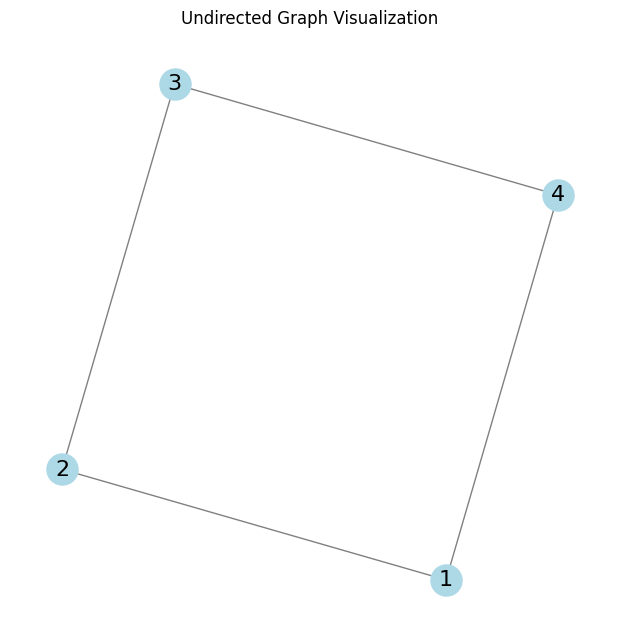

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
users = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=16, edge_color='gray')
plt.title("Undirected Graph Visualization")
plt.show()


7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

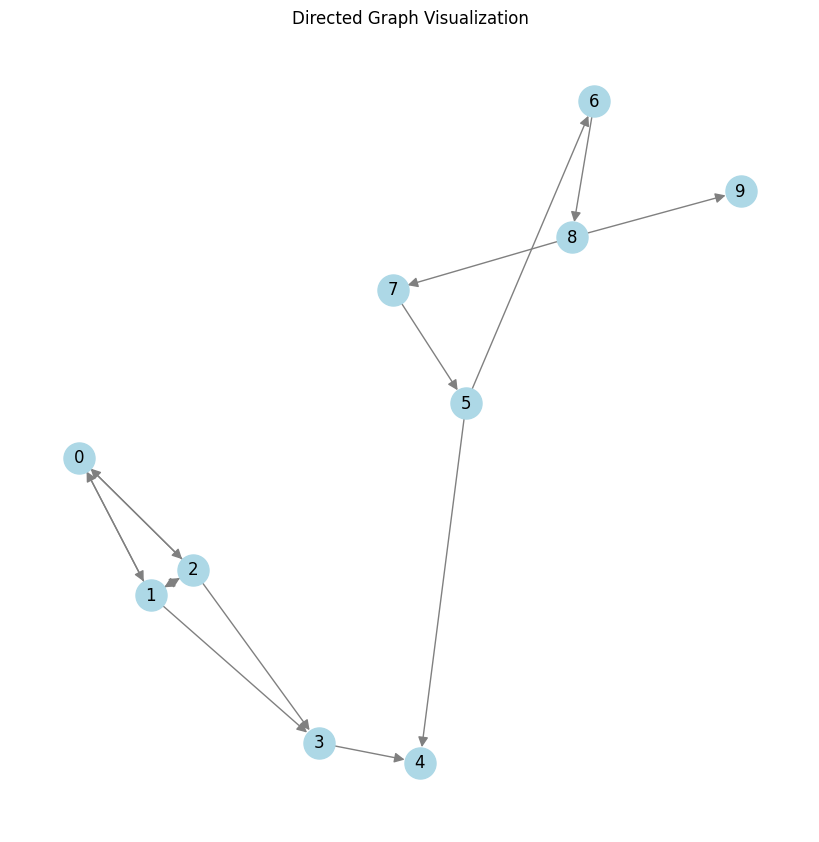

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), 
         (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12, edge_color='gray', arrowsize=15)
plt.title("Directed Graph Visualization")
plt.show()


针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 

PageRank 值:
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


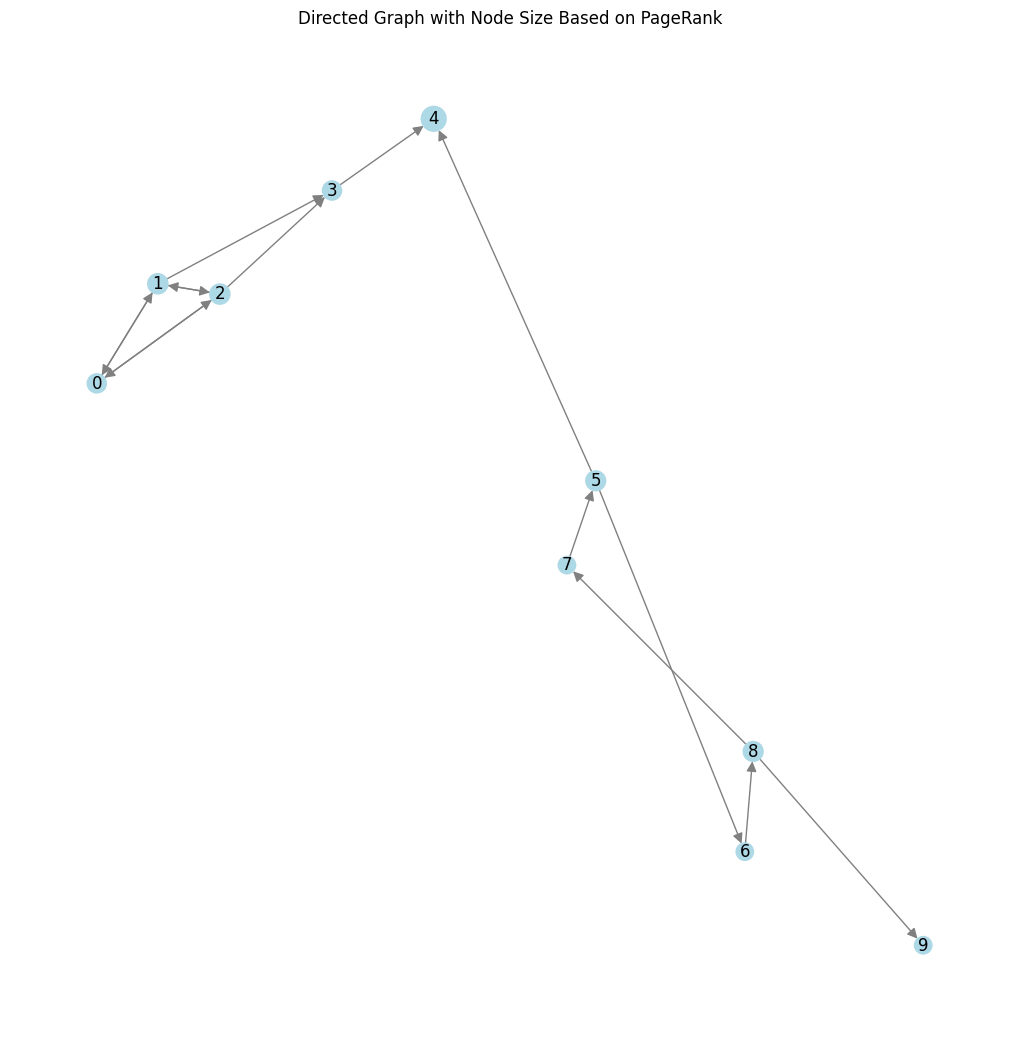

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), 
         (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

page_rank = nx.pagerank(G)

node_sizes = [v * 2000 for v in page_rank.values()]  # 放大系数以便更好地展示节点大小差异

print("PageRank 值:")
for node, pr_value in page_rank.items():
    print(f"节点 {node}: {pr_value:.4f}")

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=12, edge_color='gray', arrowsize=15)
plt.title("Directed Graph with Node Size Based on PageRank")
plt.show()
